<a href="https://colab.research.google.com/github/poudelef/Hierarchy-Model/blob/main/STFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Are we using a GPU?
!nvidia-smi

Mon Sep 29 08:50:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             30W /   70W |    2170MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [42]:
# asking persmission for drive to access files
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I used this code to convert the data into test and train sets
----------------------------------------------------------------


In [43]:
# import os
# import random
# import shutil
# from pathlib import Path

# # ====== CONFIG ======
# SOURCE_DIR = Path(r"/content/drive/MyDrive/DeepLearning_data_2type_auto")   # e.g. .../data  with subfolders cars/, bike/, plane/
# OUT_DIR    = Path(r"/content/drive/MyDrive/DeepLearning_data_2type_auto")        # a parent folder where train/ and test/ will be created
# CLASSES    = ['Apenea', 'CSA', 'Hypopnea', 'OSA', 'MSA']       # class folder names inside SOURCE_DIR
# TRAIN_RATIO = 0.7                            # 70% train / 30% test
# MOVE_FILES = False                           # set True to move instead of copy
# RANDOM_SEED = 42
# # ====================

# random.seed(RANDOM_SEED) # ensures the shuffle is always the same each run

# # Check if a file is an image
# def is_image(p: Path) -> bool:
#     return p.is_file() and p.suffix.lower() in {
#         ".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"
#     }

# def ensure_clean_dir(p: Path):
#     p.mkdir(parents=True, exist_ok=True)

# def split_and_copy(class_name: str):
#     src_class_dir = SOURCE_DIR / class_name
#     if not src_class_dir.exists():
#         print(f"[WARN] Missing class folder: {src_class_dir}")
#         return

#     imgs = [p for p in src_class_dir.iterdir() if is_image(p)]
#     if not imgs:
#         print(f"[WARN] No images found in {src_class_dir}")
#         return

#     random.shuffle(imgs)
#     n = len(imgs)
#     n_train = int(n * TRAIN_RATIO)
#     # Guarantee at least one test image if there are >= 2 total
#     if n - n_train == 0 and n >= 2:
#         n_train = n - 1

#     train_imgs = imgs[:n_train]
#     test_imgs  = imgs[n_train:]

#     # Dest folders
#     train_dst = OUT_DIR / "train" / class_name
#     test_dst  = OUT_DIR / "test" / class_name
#     ensure_clean_dir(train_dst)
#     ensure_clean_dir(test_dst)

#     # Copy or move
#     op = shutil.move if MOVE_FILES else shutil.copy2
#     for p in train_imgs:
#         op(str(p), str(train_dst / p.name))
#     for p in test_imgs:
#         op(str(p), str(test_dst / p.name))

#     print(f"[OK] {class_name}: {len(train_imgs)} → train, {len(test_imgs)} → test (total {n})")

# def main():
#     ensure_clean_dir(OUT_DIR / "train")
#     ensure_clean_dir(OUT_DIR / "test")
#     for c in CLASSES:
#         split_and_copy(c)
#     print("\nDone.")

# if __name__ == "__main__":
#     main()


----------------------------------------------------------------

In [44]:
import os
path = "/content/drive/MyDrive/DeepLearning_data_2type_auto"
os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto")

['train',
 'test',
 'HSN_1_train',
 'HSN_1_test',
 'Main',
 'HSA_2_test',
 'HSA_2_train']

In [45]:
# Walk through training data directory and list number of files
for dirpath, dirnames, filenames in os.walk(path+"/train"):
  print(f"There are {len(filenames)} images in '{dirpath}'.")

There are 0 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train'.
There are 4305 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/Apenea'.
There are 679 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/CSA'.
There are 1376 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/Hypopnea'.
There are 2454 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/OSA'.
There are 468 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/MSA'.


In [46]:
# Walk through testing data directory and list number of files
for dirpath, dirnames, filenames in os.walk(path+"/test"):
  print(f"There are {len(filenames)} images in '{dirpath}")

There are 0 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test
There are 1053 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/OSA
There are 201 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/MSA
There are 292 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/CSA
There are 590 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/Hypopnea
There are 1846 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/Apenea


In [47]:
train_dir = path +"/train"
test_dir = path+"/test"

### Loading Date into Tensorflow Compatable format

#### Directory Structure Needed
```
main_directory/
  class_a/
    a_image_1.jpg
    a_image_2.jpg
  class_b/
    b_image_1.jpg
    b_image_2.jpg
```

```
TensorFlow will:

1. Detect subfolders (class_a, class_b) as labels.
2. Load the images.
3. Return a dataset you can feed into a model.

Supported image formats: .jpeg, .jpg, .png, .bmp, .gif
```


Checkout for more detail: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [48]:
import tensorflow as tf
IMG_SIZE = (256,256)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, # Main Path
                                                                 batch_size=BATCH_SIZE, # many images per batch
                                                                 image_size=IMG_SIZE, # Target size of the image (has to be consistent)
                                                                 label_mode="categorical", # catrgorical data
                                                                 shuffle=True,) # mix
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 shuffle=True,)

Found 9282 files belonging to 5 classes.
Found 3982 files belonging to 5 classes.


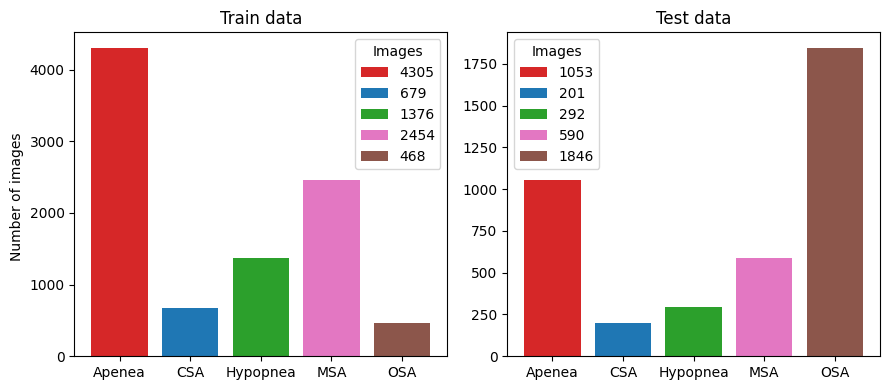

In [49]:
import matplotlib.pyplot as plt

train_count = []
test_count = []

for dirpath, dirnames, filenames in os.walk(path+"/train"):
    train_count.append(len(filenames))
for dirpath, dirnames, filenames in os.walk(path+"/test"):
    test_count.append(len(filenames))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# --- Train data ---
Classes = list(train_data.class_names)
counts = list(train_count[1:])
bar_labels = list(train_count[1:])
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:brown']
ax1.bar(Classes, counts, label=bar_labels, color=bar_colors)
ax1.set_ylabel('Number of images ')
ax1.set_title('Train data')
ax1.legend(title='Images')

# --- Test data ---
Classes = list(test_data.class_names)
counts = list(test_count[1:])
bar_labels = list(test_count[1:])
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:brown']
ax2.bar(Classes, counts, label=bar_labels, color=bar_colors)
ax2.set_title('Test data')
ax2.legend(title='Images')

plt.tight_layout()
plt.show()


In [50]:
# Check the training data datatype
train_data , test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>)

In [51]:
train_data.class_names , test_data.class_names

(['Apenea', 'CSA', 'Hypopnea', 'MSA', 'OSA'],
 ['Apenea', 'CSA', 'Hypopnea', 'MSA', 'OSA'])

```
Labels are just classes, We do one hot encoding ( change vecotr into 0 or 1). We convert it into a categorical vector so it is easy for computer to work on
categorical vector is just a fancy name for a one-hot encoded vector.
If we label CSA =0, OSA=1, MSA=2 directly, the model might think “2 is larger than 1” → but classes don’t have that kind of order.
One-hot encoding avoids this by treating each class equally, with no sense of order.
```

In [52]:
for images, lables in train_data.take(1):
  print("Image batch shape:", images.shape)
  print("Label batch shape:", lables.shape)
  print("First 5 lablels:\n", lables[:5].numpy())

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32, 5)
First 5 lablels:
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [53]:
# Images is represented as pixal value and labes as one hot encoded
for images, labels in train_data.take(1):
  print(images, lables)

tf.Tensor(
[[[[ 54.250195   89.60876    40.396694 ]
   [ 37.8135     79.12843    24.82917  ]
   [ 47.290234   87.310234   20.521717 ]
   ...
   [ 27.126095   92.13867    24.045937 ]
   [ 24.356907  100.94382    25.131844 ]
   [ 59.89313    90.360085   63.299866 ]]

  [[ 68.85892   115.406265   53.785217 ]
   [169.79683   233.81726   131.33789  ]
   [171.46445   240.89554   104.8443   ]
   ...
   [148.7232    238.60648   131.19992  ]
   [141.58849   241.55324   147.11877  ]
   [ 74.348625  112.207985   79.5034   ]]

  [[ 66.33594   121.467575   49.55781  ]
   [162.44211   248.11835   110.7175   ]
   [161.60742   252.95157    78.68321  ]
   ...
   [136.63594   250.97421   117.03516  ]
   [128.21524   249.80899   140.50095  ]
   [ 65.54719   115.7643     74.34032  ]]

  ...

  [[ 62.55      121.54594    48.490547 ]
   [157.45593   245.20007   102.03555  ]
   [164.9168    251.29805    77.376175 ]
   ...
   [130.92383   251.83867   115.07031  ]
   [120.33102   253.65039   137.54242  ]
   [ 

In [54]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  plt.show()
  return img


Image shape: (343, 435, 3)


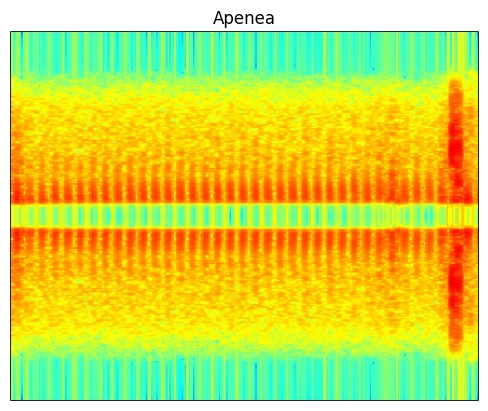

Image shape: (343, 435, 3)


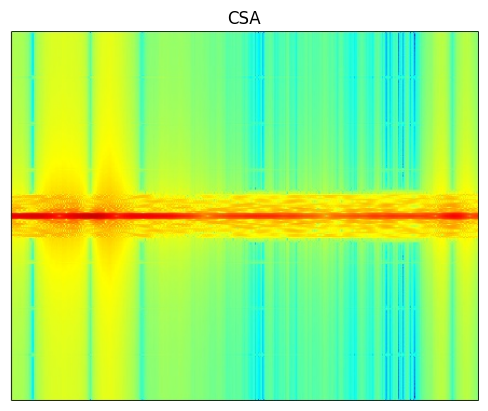

Image shape: (343, 435, 3)


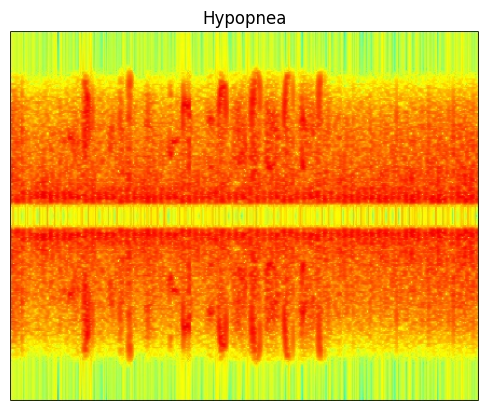

Image shape: (343, 434, 3)


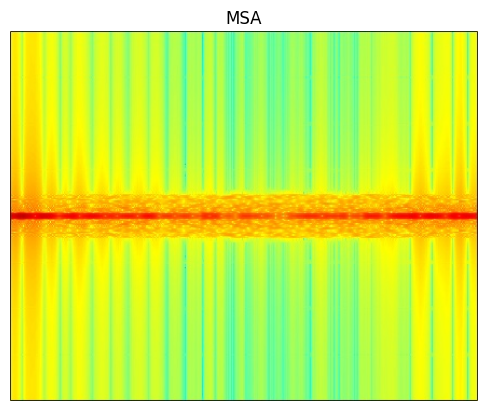

Image shape: (343, 434, 3)


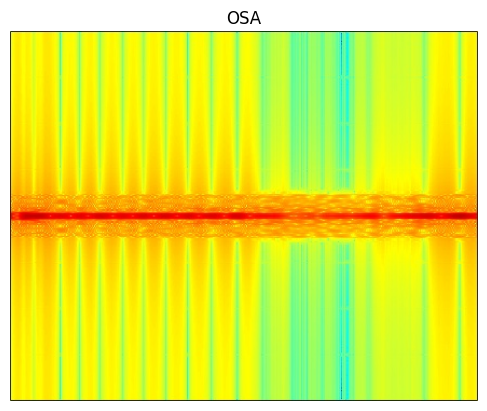

In [55]:
# View a random image from the training dataset
a = list(train_data.class_names)
for i in a:
  new_path = path + "/train/"
  view_random_image(new_path ,i)

# ________________________________

In [56]:
train_m_dir = path +"/HSN_1_train"
test_m_dir = path+"/HSN_1_test"
train_a_dir = path+"/HSA_2_train"
test_a_dir = path+"/HSA_2_test"


In [57]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_m_data = tf.keras.preprocessing.image_dataset_from_directory(train_m_dir, # Main Path
                                                                 batch_size=BATCH_SIZE, # many images per batch
                                                                 image_size=IMG_SIZE, # Target size of the image (has to be consistent)
                                                                 label_mode="categorical", # catrgorical data
                                                                 shuffle=True,) # mix

test_m_data = tf.keras.preprocessing.image_dataset_from_directory(test_m_dir, # Main Path
                                                                 batch_size=BATCH_SIZE, # many images per batch
                                                                 image_size=IMG_SIZE, # Target size of the image (has to be consistent)
                                                                 label_mode="categorical", # catrgorical data
                                                                 shuffle=True,) # mix

train_a_data = tf.keras.preprocessing.image_dataset_from_directory(train_a_dir,
                                                                    batch_size = BATCH_SIZE,
                                                                    image_size= IMG_SIZE,
                                                                    label_mode="categorical",
                                                                    shuffle=True)

test_a_data = tf.keras.preprocessing.image_dataset_from_directory(test_a_dir,
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode ="categorical",
                                                                shuffle=True)



Found 5681 files belonging to 2 classes.
Found 2436 files belonging to 2 classes.
Found 3601 files belonging to 3 classes.
Found 1546 files belonging to 3 classes.


In [58]:
train_m_data.class_names, test_m_data.class_names

(['Apenea', 'Hypopnea'], ['Apenea', 'Hypopnea'])

In [59]:
train_a_data.class_names, test_a_data.class_names

(['CSA', 'MSA', 'OSA'], ['CSA', 'MSA', 'OSA'])

In [85]:
train_a_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

"history" usually refers to a record-keeping object that logs the model's performance metrics (like loss and accuracy) at each step or epoch of the training process.

In [60]:
# # Flow chart
# # input layer -> rescaling -> base_model -> gives feature map -> flattern using globalAveragepooling
# # output layer -> 2 dense layer
# # tf.keras.model(input, output) -> it starts from input and goes to output.

# # this is feature extraction. means all the layers will be frozen during training

# # 1. Create base model with tf.keras.applications
# base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)

# # 2. Freeze the base model (so the pre-learned patterns remain)
# base_model.trainable = False




# # 3. Create inputs into the base model
# inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# # 4. Rescaling
# # x = tf.keras.layers.Rescaling(1./255)(inputs)

# # 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
# x = base_model(inputs)
# # Check data shape after passing it to base_model
# print(f"Shape after base_model: {x.shape}")

# # 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
# # this is feature extration where is what our model learns from base model. it converts 4D to 2D.
# x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# print(f"After GlobalAveragePooling2D(): {x.shape}")

# # 7. Create the output activation layer
# outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

# # 8. Combine the inputs with the outputs into a model
# model = tf.keras.Model(inputs, outputs)

# # 9. Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # 10. Fit the model (we use less steps for validation so it's faster)
# history= model.fit(train_data,
#                                  epochs= 3,
#                                  steps_per_epoch=len(train_data),
#                                  validation_data=test_data,
#                                  # Go through less of the validation data so epochs are faster (we want faster experiments!)
#                                  validation_steps=int(0.25 * len(test_data)),
#                                  )

In [61]:
# model.evaluate(test_data)

In [62]:
# for layer_numbers, layer in enumerate(model.layers):
  # print(layer_numbers, layer.name)

In [63]:
# for layer_numbers, layer in enumerate(base_model.layers):
  # print(layer_numbers, layer.name, layer.trainable, layer.trainable_weights)

In [64]:
# model.summary()

In [65]:
# base_model.summary()

In [66]:
def predict_img(img_path, model, train_data):
  """
  Preprocess the image into required shape and size and predicts the class
  """
  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,244))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  # Our image has 3 dim right now but we need 4 dim and batch size counts as dim (224,224,3)
  img_array = tf.expand_dims(img_array, axis=0) # (1, 244, 244, 3)
  img_array *= (1/.255)
  predict = model.predict(img_array)
  print("Raw prediction:", predict)
  pred_class = tf.argmax(predict, axis=1).numpy()[0]
  print("Predicted class index:", pred_class)
  classname = train_data.class_names
  print("Predicted class : ", classname[pred_class])

# predict_img("/content/drive/MyDrive/DeepLearning_data_2type_auto/HSN_1_train/Apenea/1_4.jpg", model, train_data)


In [67]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [82]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



def train_model(train_data,
                test_data,activation,
                model_name = tf.keras.applications.MobileNetV2,
                loss_function = "categorical_crossentropy" ,
                trainable:bool=False,
                unfreeze:int = 2,
                rescaling:bool = True,
                epochs:int = 20,
                output_shape: int = 2,
                file_path=""):

  """
    Create a model and plots the lost-accuracy curve along with the summary of the model

    Parameters:
    - train_data: Training data
    - test_data: Validation data
    - activation: "Any sctivation function"
    - model: Type of model ( keras.application ) you want to run. Default is tf.keras.applications.MobileNetV2
    - training (bool): Whether the base model is trainable. Default is False.
    - rescaling (bool): Whether you need to rescale the data or not (0-1). Default is true
    - epochs (int): Iteration you want to run a model. Default is 2.
    - output_shape (int): Number of classes for the output layer. Default is 2.

    Returns:
    - Model: The compiled model with specified input and output settings.
    """


  early_stop = EarlyStopping(
      monitor="val_loss",      # or "val_accuracy"
      min_delta=1e-4,          # required improvement to count as “better”
      patience=5,              # epochs to wait with no improvement
      mode="min",              # "min" for loss, "max" for accuracy
      restore_best_weights=True
    )

  ckpt = ModelCheckpoint(
        file_path,
        monitor="val_loss",
        mode="min",
        save_best_only=True,
        verbose=1
    )

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.00001)




# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
  tf.keras.backend.clear_session(
    free_memory=True
  )

  base_model = model_name(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = trainable

# This is Fine Tuning
# If trainable is True then we freeze all the layer excpet last 10 layer and change the weights (train) of the layer with our data
  if base_model.trainable:
    for layer in base_model.layers[:-unfreeze]:
      layer.trainable= False

  inputs = tf.keras.layers.Input(shape=(224,224,3), name ="input_layer")

  if rescaling:
    # x = tf.keras.layers.Rescaling(1./255)(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs, data_format=None)
    x = base_model(x, training=False) # Extract features without updating the weights
  else:
    x = base_model(inputs, training=False)

  x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
  outputs = tf.keras.layers.Dense(output_shape, activation= activation, name="output_layer")(x)
  model = tf.keras.Model(inputs, outputs)

  model.compile(loss= loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])
  history = model.fit(
      train_data,
      epochs = epochs,
      steps_per_epoch=len(train_data),
      validation_data=test_data,
      validation_steps=None,
      callbacks=[early_stop, ckpt, reduce_lr]
      )
  # summary
  model.summary()
  # Plot
  plot_loss_curves(history=history)
  # print("validation on all test data")
  # print(model.evaluate(test_data))

  # # We can print to see with layers are trainable
  # for layer_numbers, layer in enumerate(base_model.layers):
  #   print(layer_numbers, layer.name, layer.trainable)

  return model


Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8656 - loss: 0.3077
Epoch 1: val_loss improved from inf to 0.21878, saving model to 1st model.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 63s 285ms/step - accuracy: 0.8659 - loss: 0.3071 - val_accuracy: 0.9060 - val_loss: 0.2188 - learning_rate: 0.0010
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9568 - loss: 0.1135
Epoch 2: val_loss improved from 0.21878 to 0.15631, saving model to 1st model.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.9568 - loss: 0.1135 - val_accuracy: 0.9409 - val_loss: 0.1563 - learning_rate: 0.0010
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9669 - loss: 0.0925
Epoch 3: val_loss improved from 0.15631 to 0.13271, saving model to 1st model.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.9669 - loss: 0.0926 - val_accuracy: 0.9503 - val_loss: 0.1327 - learning_rate: 0.0010
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,792 (8.66 MB)

 Trainable params: 5,122 (20.01 KB)

 Non-trainable params: 2,255,424 (8.60 MB)

 Optimizer params: 10,246 (40.03 KB)

<Functional name=functional, built=True>

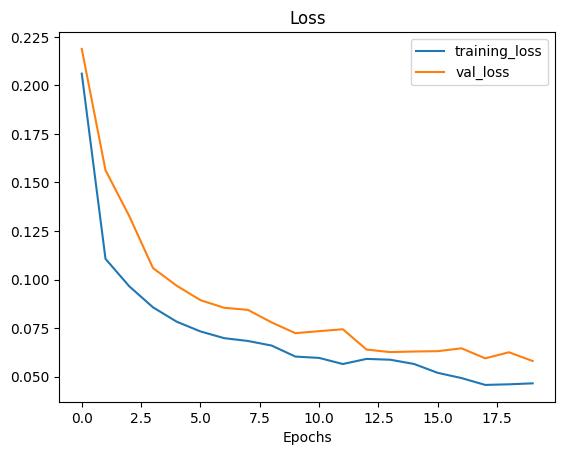

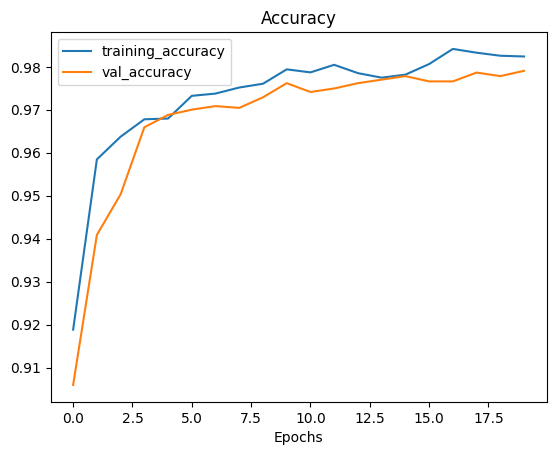

In [69]:
train_model(train_m_data, test_m_data,"sigmoid" ,tf.keras.applications.MobileNetV2,"binary_crossentropy", True,2,True,20,2, "1st model.keras")

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.4663 - loss: 1.0691
Epoch 1: val_loss improved from inf to 0.75506, saving model to 2nd model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.4676 - loss: 1.0676 - val_accuracy: 0.6850 - val_loss: 0.7551 - learning_rate: 1.0000e-04
Epoch 2/20
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6939 - loss: 0.7279
Epoch 2: val_loss improved from 0.75506 to 0.68248, saving model to 2nd model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.6940 - loss: 0.7276 - val_accuracy: 0.7173 - val_loss: 0.6825 - learning_rate: 1.0000e-04
Epoch 3/20
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7395 - loss: 0.6569
Epoch 3: val_loss improved from 0.68248 to 0.63636, saving model to 2nd model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.7396 - loss: 0.6567 - val_accuracy: 0.7458 - val_loss: 0.6364 - learning_rate: 1.0000e-04
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,269,515 (8.66 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 7,688 (30.04 KB)

<Functional name=functional, built=True>

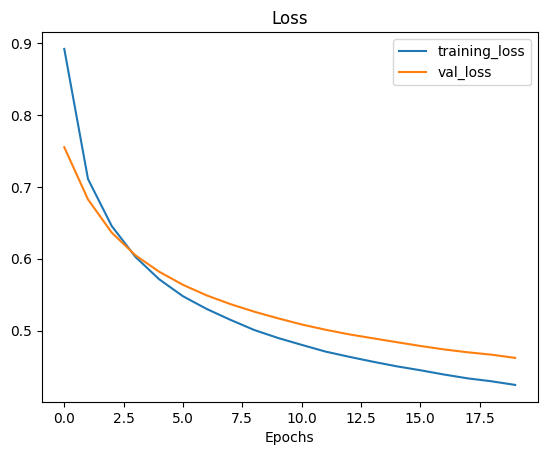

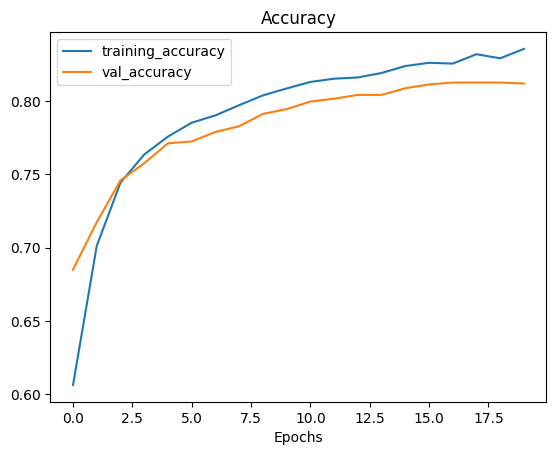

In [84]:
train_model(train_a_data, test_a_data,"softmax" ,tf.keras.applications.MobileNetV2,"categorical_crossentropy",True,1,True,20,3, "2nd model.keras")


# Practice


In [ ]:
# Define input shape of tensorflow
input = (1, 2 ,2 ,3)
# create a random tensor
tf.random.set_seed(42)
input = tf.random.normal(input)
print(f"Before pooling:\n {input}")
x = tf.keras.layers.GlobalAveragePooling2D()(input)
print(f"Global AveragePooling@D ( converts 4D into 2D) :{x}")
n = tf.keras.layers.GlobalMaxPooling2D()(input)
print(f"Maxpooling2D: {n}")

